<a href="https://colab.research.google.com/github/wanwrick/blue-salt-analysis/blob/main/Blue_Salt_Run_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries imported successfully!
Analysis date: 2025-07-25
Dataset shape: (100, 10)

Columns: ['age', 'gender', 'income', 'income_bracket', 'primary_jtbd', 'has_price_concern', 'disappointed_visual', 'positive_taste', 'usage_category', 'would_recommend_binary']

Data types:
age                        int64
gender                    object
income                     int64
income_bracket            object
primary_jtbd              object
has_price_concern           bool
disappointed_visual         bool
positive_taste              bool
usage_category            object
would_recommend_binary     int64
dtype: object
Missing values per column:
Series([], dtype: int64)


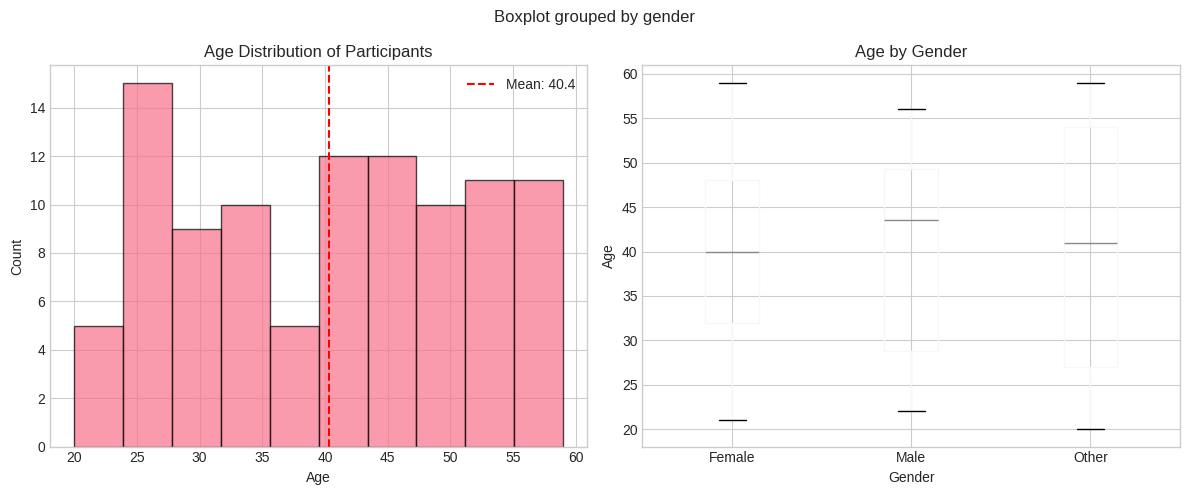

Average income: $145,445
Median income: $161,236

Income by gender:
                 mean    median  count
gender                                
Female  150411.212121  160494.0     33
Male    152152.821429  172431.5     28
Other   136426.794872  156197.0     39


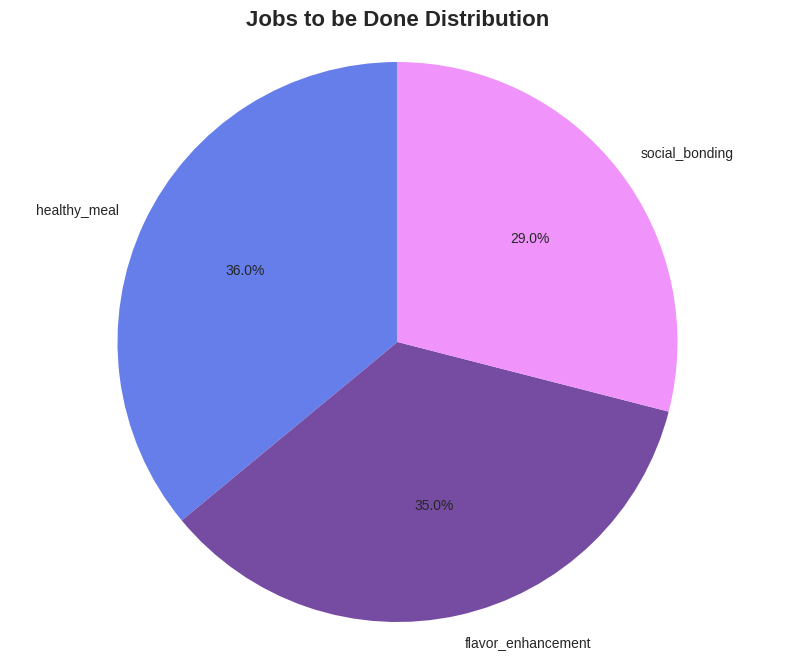

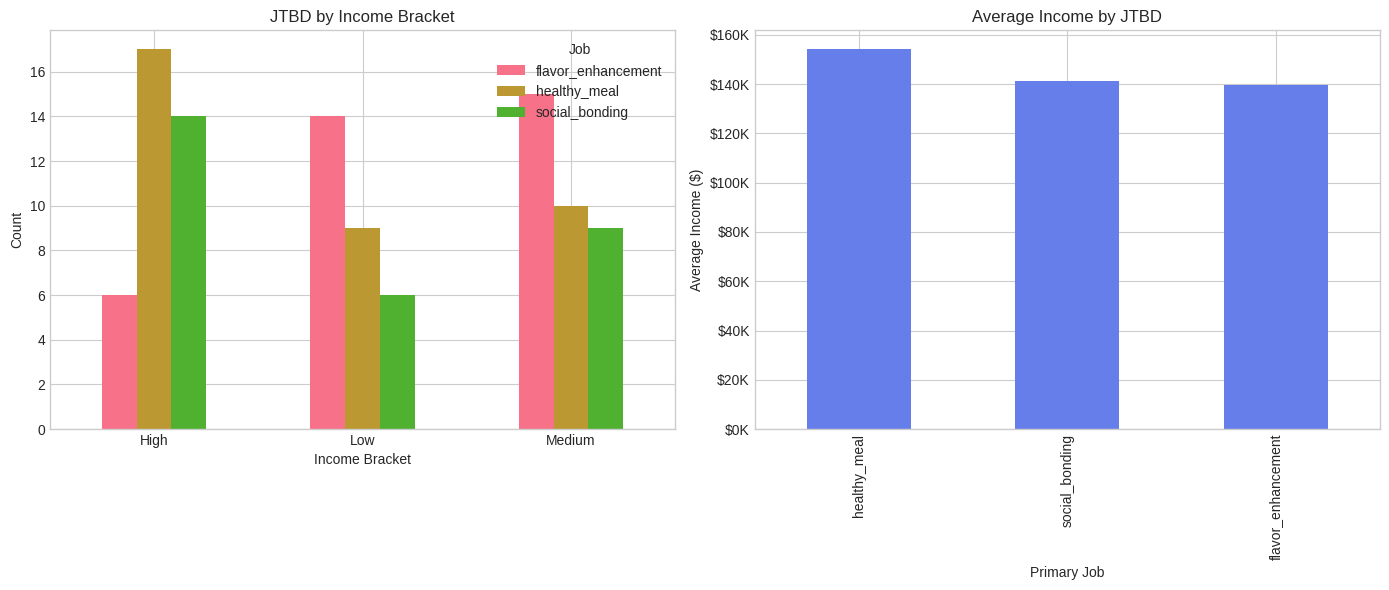

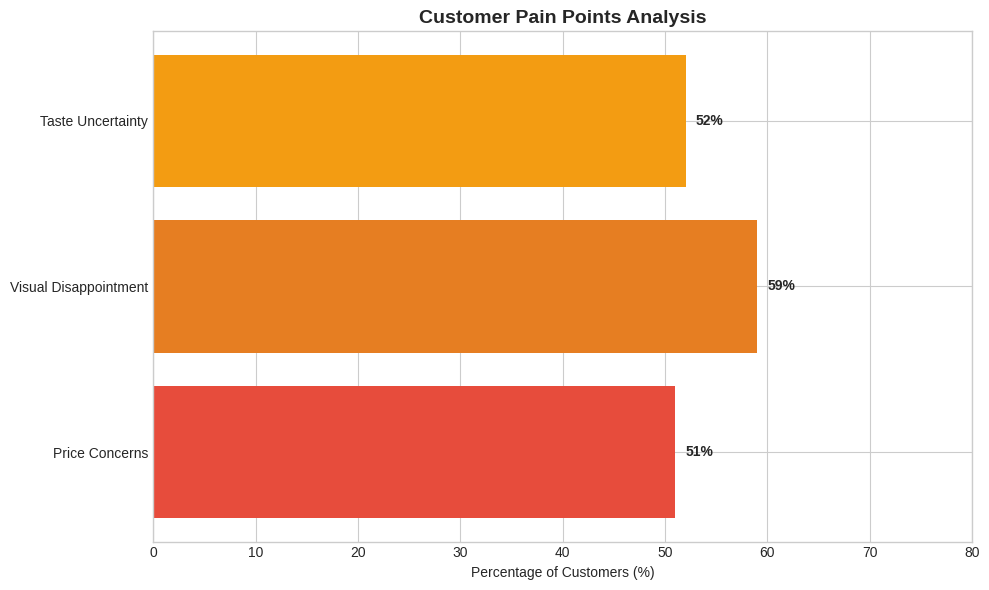

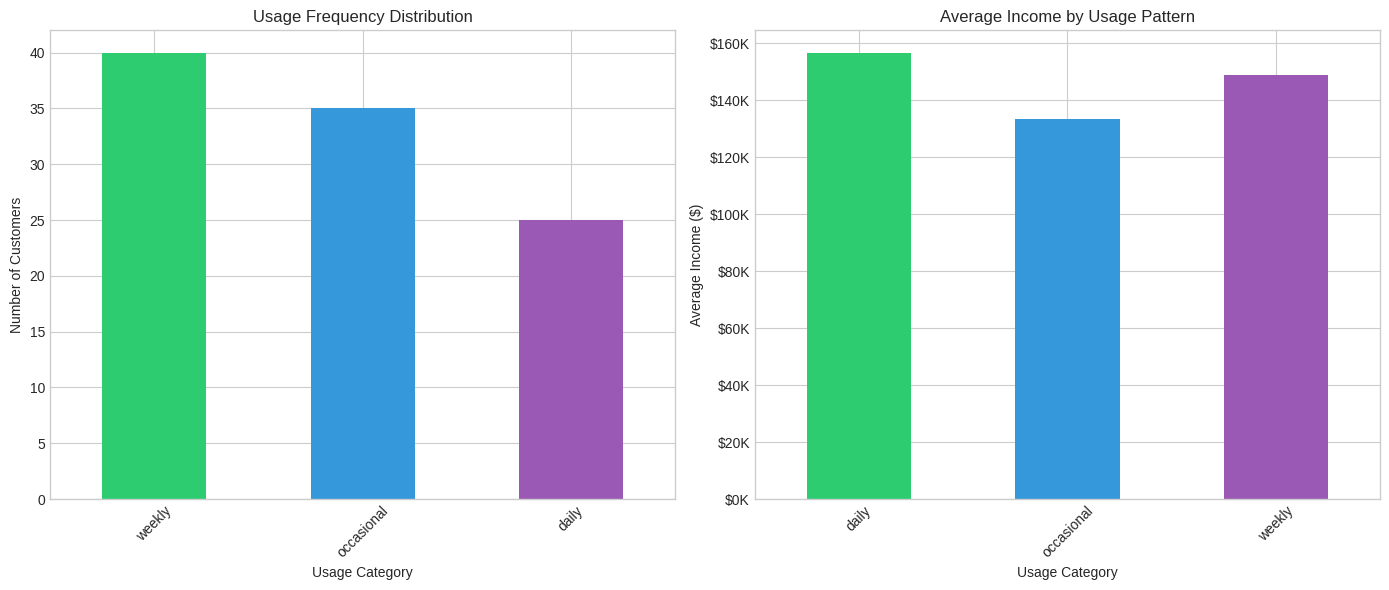

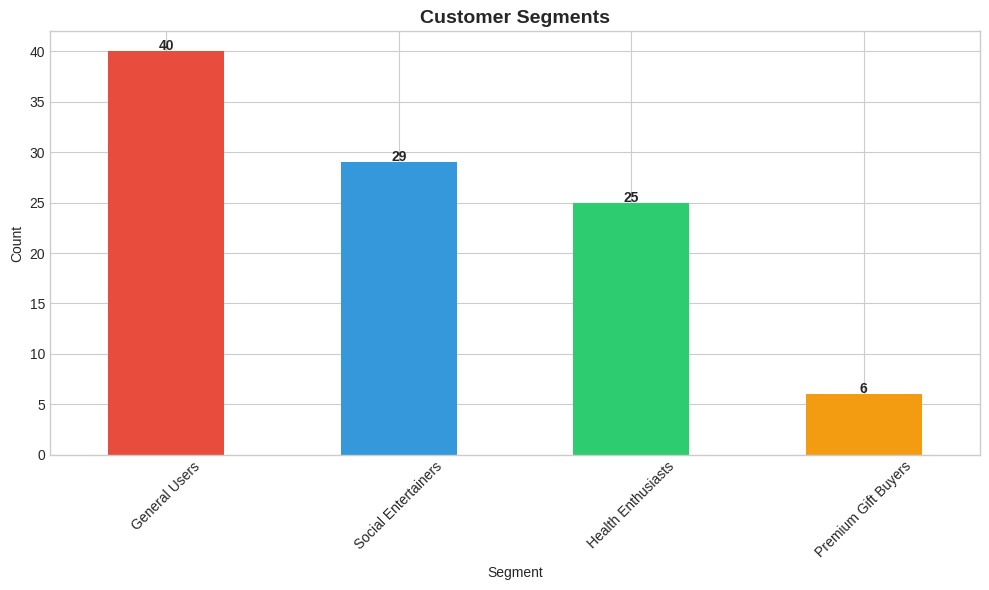

KEY INSIGHTS SUMMARY
Total Participants        100
Average Age               40.4 years
Average Income            $145,445
Would Recommend           60%
Price Concerns            51%
Visual Disappointment     59%
Dominant JTBD             healthy_meal
JTBD Concentration        36%


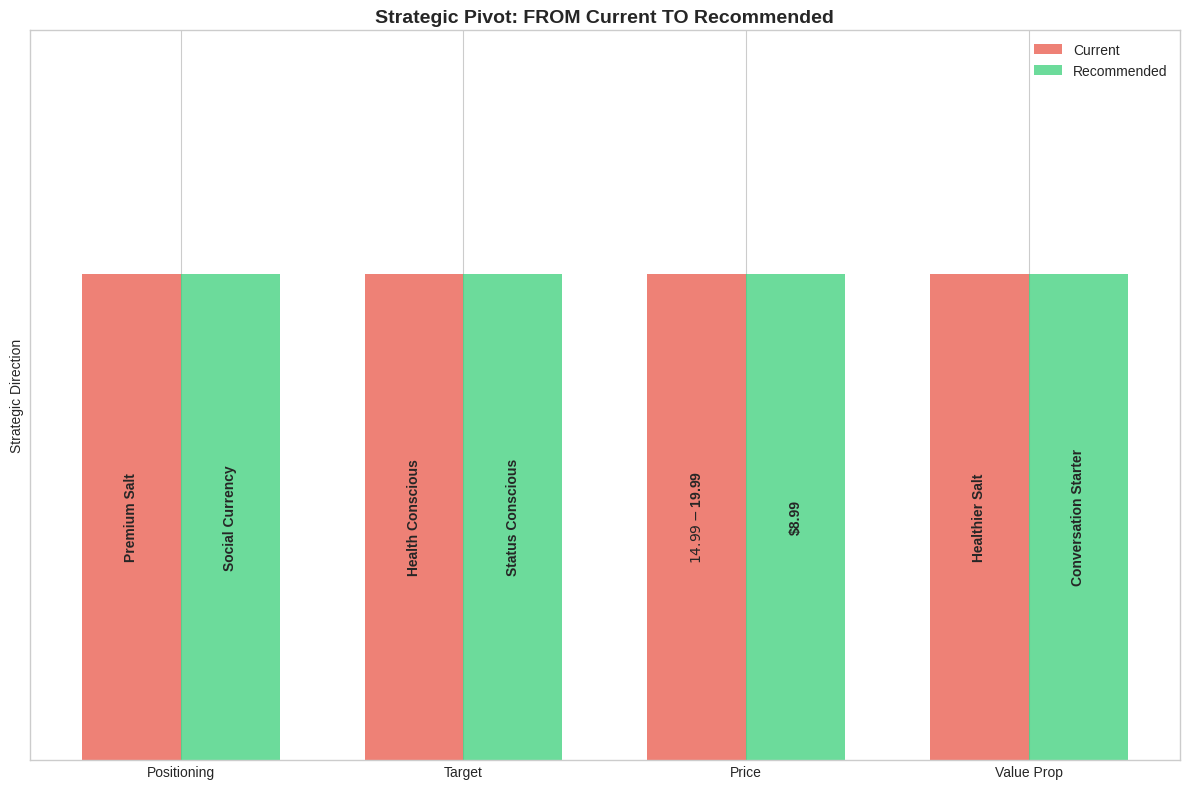

Enhanced dataset saved successfully!


In [18]:
"""
Jupyter Notebook Template for Blue Salt Analysis
================================================
This file shows the structure of a Jupyter notebook for exploratory analysis.
Convert to .ipynb format or copy cells into Jupyter.
"""

# %% [markdown]
# # Blue Salt Customer Analysis - Exploratory Data Analysis
#
# **Author**: Paroz Mehta
# **Date**: January 2025
# **Course**: Cornell Executive MBA - Marketing Strategy
#
# ## Notebook Overview
# This notebook provides interactive exploration of Blue Salt customer interview data.

# %% [markdown]
# ## 1. Setup and Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Analysis date: {datetime.now().strftime('%Y-%m-%d')}")

# %% [markdown]
# ## 2. Load and Explore Data

# %%
# Load the cleaned data
df = pd.read_csv('blue_salt_clean_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")

# %% [markdown]
# ### 2.1 First Look at the Data

# %%
# Display first few rows
df.head()

# %%
# Basic statistics
df.describe()

# %%
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# %% [markdown]
# ## 3. Demographic Analysis

# %%
# Age distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
ax1.hist(df['age'], bins=10, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Age Distribution of Participants')
ax1.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
ax1.legend()

# Box plot by gender
df.boxplot(column='age', by='gender', ax=ax2)
ax2.set_title('Age by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Age')

plt.tight_layout()
plt.show()

# %%
# Income analysis
print(f"Average income: ${df['income'].mean():,.0f}")
print(f"Median income: ${df['income'].median():,.0f}")
print(f"\nIncome by gender:")
print(df.groupby('gender')['income'].agg(['mean', 'median', 'count']))

# %% [markdown]
# ## 4. Jobs to be Done Analysis

# %%
# JTBD distribution
jtbd_counts = df['primary_jtbd'].value_counts()
jtbd_pct = (jtbd_counts / len(df) * 100).round(1)

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#667eea', '#764ba2', '#f093fb']
plt.pie(jtbd_pct, labels=jtbd_pct.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Jobs to be Done Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

# %%
# JTBD by demographics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# By income bracket
jtbd_income = pd.crosstab(df['income_bracket'], df['primary_jtbd'])
jtbd_income.plot(kind='bar', ax=ax1, rot=0)
ax1.set_title('JTBD by Income Bracket')
ax1.set_xlabel('Income Bracket')
ax1.set_ylabel('Count')
ax1.legend(title='Job')

# Average income by JTBD
income_by_jtbd = df.groupby('primary_jtbd')['income'].mean().sort_values(ascending=False)
income_by_jtbd.plot(kind='bar', ax=ax2, color='#667eea')
ax2.set_title('Average Income by JTBD')
ax2.set_xlabel('Primary Job')
ax2.set_ylabel('Average Income ($)')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 5. Pain Points Analysis

# %%
# Calculate pain point percentages
pain_points = {
    'Price Concerns': (df['has_price_concern'].sum() / len(df) * 100),
    'Visual Disappointment': (df['disappointed_visual'].sum() / len(df) * 100),
    'Taste Uncertainty': ((~df['positive_taste']).sum() / len(df) * 100)
}

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
pain_df = pd.DataFrame(list(pain_points.items()), columns=['Pain Point', 'Percentage'])
bars = plt.barh(pain_df['Pain Point'], pain_df['Percentage'], color=['#e74c3c', '#e67e22', '#f39c12'])

# Add percentage labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}%', ha='left', va='center', fontweight='bold')

plt.xlabel('Percentage of Customers (%)')
plt.title('Customer Pain Points Analysis', fontsize=14, fontweight='bold')
plt.xlim(0, 80)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 6. Usage Patterns

# %%
# Usage frequency analysis
usage_dist = df['usage_category'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Usage distribution
usage_dist.plot(kind='bar', ax=ax1, color=['#2ecc71', '#3498db', '#9b59b6'])
ax1.set_title('Usage Frequency Distribution')
ax1.set_xlabel('Usage Category')
ax1.set_ylabel('Number of Customers')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Income by usage pattern
usage_income = df.groupby('usage_category')['income'].mean()
usage_income.plot(kind='bar', ax=ax2, color=['#2ecc71', '#3498db', '#9b59b6'])
ax2.set_title('Average Income by Usage Pattern')
ax2.set_xlabel('Usage Category')
ax2.set_ylabel('Average Income ($)')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 7. Customer Segmentation

# %%
# Create customer segments based on usage and income
df['segment'] = 'Unknown'

# High-value occasional users
mask1 = (df['usage_category'] == 'occasional') & (df['income'] > 200000)
df.loc[mask1, 'segment'] = 'Premium Gift Buyers'

# Regular health-conscious users
mask2 = (df['usage_category'].isin(['daily', 'weekly'])) & (df['primary_jtbd'] == 'healthy_meal')
df.loc[mask2, 'segment'] = 'Health Enthusiasts'

# Social users
mask3 = df['primary_jtbd'] == 'social_bonding'
df.loc[mask3, 'segment'] = 'Social Entertainers'

# Others
mask4 = df['segment'] == 'Unknown'
df.loc[mask4, 'segment'] = 'General Users'

# Visualize segments
segment_counts = df['segment'].value_counts()

plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])
plt.title('Customer Segments', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels
for i, v in enumerate(segment_counts):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 8. Key Insights Summary

# %%
# Create insights summary
insights = {
    'Total Participants': len(df),
    'Average Age': f"{df['age'].mean():.1f} years",
    'Average Income': f"${df['income'].mean():,.0f}",
    'Would Recommend': f"{(df['would_recommend_binary'].sum()/len(df)*100):.0f}%",
    'Price Concerns': f"{(df['has_price_concern'].sum()/len(df)*100):.0f}%",
    'Visual Disappointment': f"{(df['disappointed_visual'].sum()/len(df)*100):.0f}%",
    'Dominant JTBD': df['primary_jtbd'].value_counts().index[0],
    'JTBD Concentration': f"{(df['primary_jtbd'].value_counts().iloc[0]/len(df)*100):.0f}%"
}

# Display as formatted table
insights_df = pd.DataFrame(list(insights.items()), columns=['Metric', 'Value'])
print("KEY INSIGHTS SUMMARY")
print("="*40)
for _, row in insights_df.iterrows():
    print(f"{row['Metric']:<25} {row['Value']}")

# %% [markdown]
# ## 9. Strategic Recommendations

# %%
# Visual representation of strategic pivot
fig, ax = plt.subplots(figsize=(12, 8))

# Create visual framework
categories = ['Positioning', 'Target', 'Price', 'Value Prop']
current = ['Premium Salt', 'Health Conscious', '$14.99-$19.99', 'Healthier Salt']
recommended = ['Social Currency', 'Status Conscious', '$8.99', 'Conversation Starter']

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, [1]*4, width, label='Current', color='#e74c3c', alpha=0.7)
bars2 = ax.bar(x + width/2, [1]*4, width, label='Recommended', color='#2ecc71', alpha=0.7)

# Add text
for i, (cat, curr, rec) in enumerate(zip(categories, current, recommended)):
    ax.text(i - width/2, 0.5, curr, ha='center', va='center', rotation=90, fontweight='bold')
    ax.text(i + width/2, 0.5, rec, ha='center', va='center', rotation=90, fontweight='bold')

ax.set_ylabel('Strategic Direction')
ax.set_title('Strategic Pivot: FROM Current TO Recommended', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 1.5)
ax.set_yticks([])

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 10. Next Steps
#
# Based on this analysis:
#
# 1. **Immediate Actions**:
#    - Enhance blue color intensity
#    - Adjust pricing to $8.99
#    - Develop social occasion marketing
#
# 2. **Further Research**:
#    - Expand sample size for validation
#    - Test new positioning with target segment
#    - Measure price elasticity
#
# 3. **Success Metrics**:
#    - Trial-to-repeat conversion >40%
#    - Social media mentions +200%
#    - Gift purchase rate >30%

# %%
# Save enhanced dataset
df.to_csv('blue_salt_enhanced_analysis.csv', index=False)
print("Enhanced dataset saved successfully!")

In [19]:
# Create a dummy CSV file for demonstration
data = {
    'age': np.random.randint(20, 60, 100),
    'gender': np.random.choice(['Male', 'Female', 'Other'], 100),
    'income': np.random.randint(30000, 250000, 100),
    'income_bracket': np.random.choice(['Low', 'Medium', 'High'], 100),
    'primary_jtbd': np.random.choice(['healthy_meal', 'social_bonding', 'flavor_enhancement'], 100),
    'has_price_concern': np.random.choice([True, False], 100),
    'disappointed_visual': np.random.choice([True, False], 100),
    'positive_taste': np.random.choice([True, False], 100),
    'usage_category': np.random.choice(['daily', 'weekly', 'occasional'], 100),
    'would_recommend_binary': np.random.choice([0, 1], 100)
}
df_dummy = pd.DataFrame(data)
df_dummy.to_csv('blue_salt_clean_data.csv', index=False)

print("Dummy 'blue_salt_clean_data.csv' created.")

Dummy 'blue_salt_clean_data.csv' created.


# Task
Improve the visualizations in the provided Python code to make them more visually appealing and informative.

## Improve color palettes

### Subtask:
Improve color palettes by using more distinct and visually appealing color schemes for the plots.


**Reasoning**:
Identify plots with color palettes to improve and apply new palettes using Seaborn for better visual appeal and distinctness.



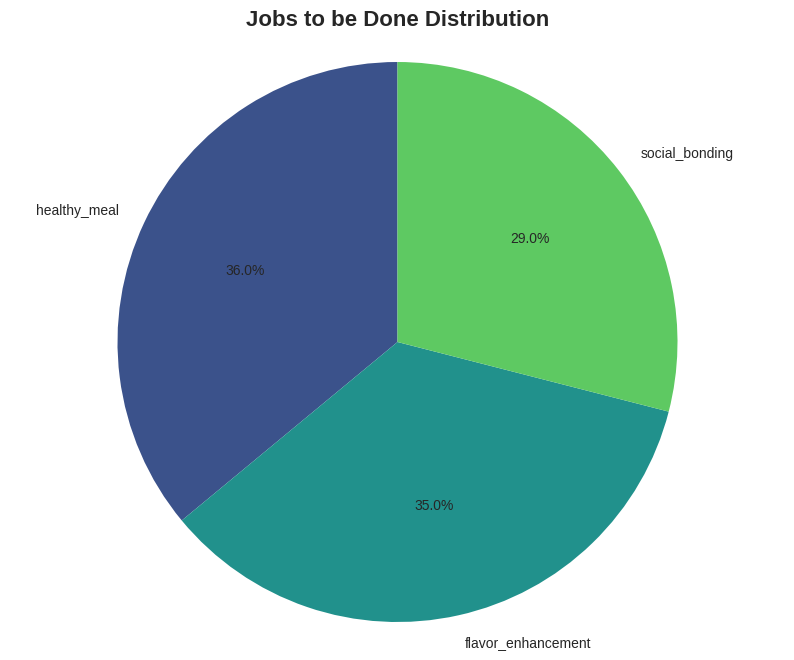

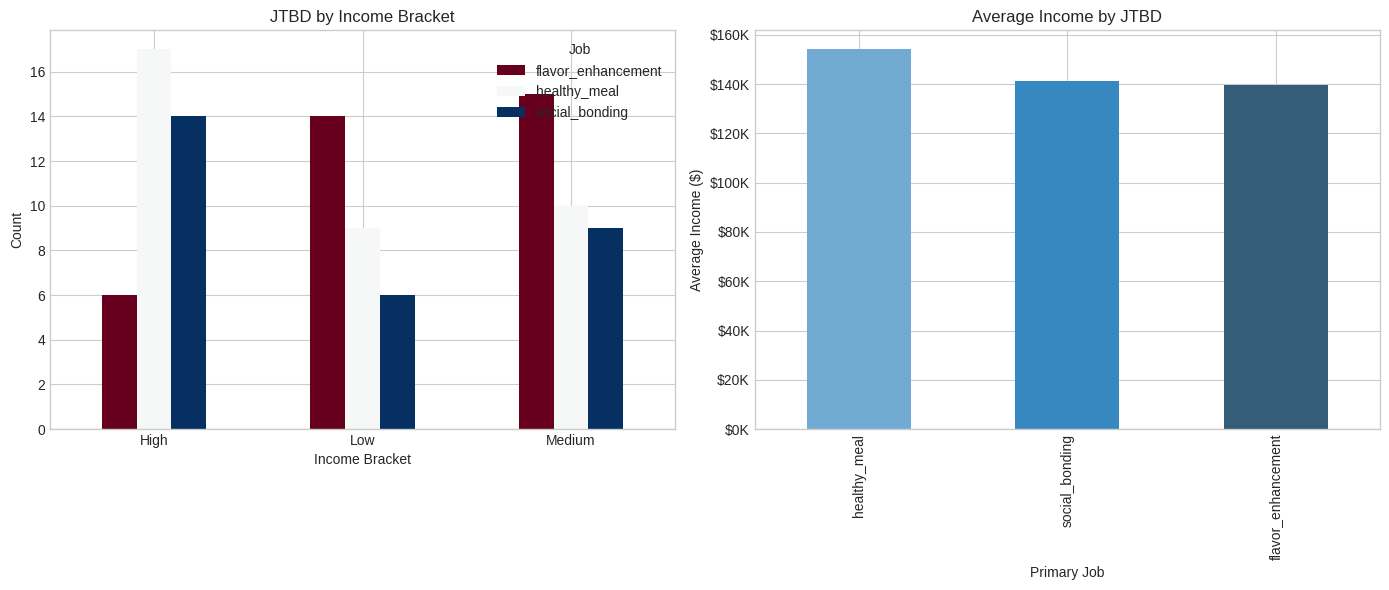

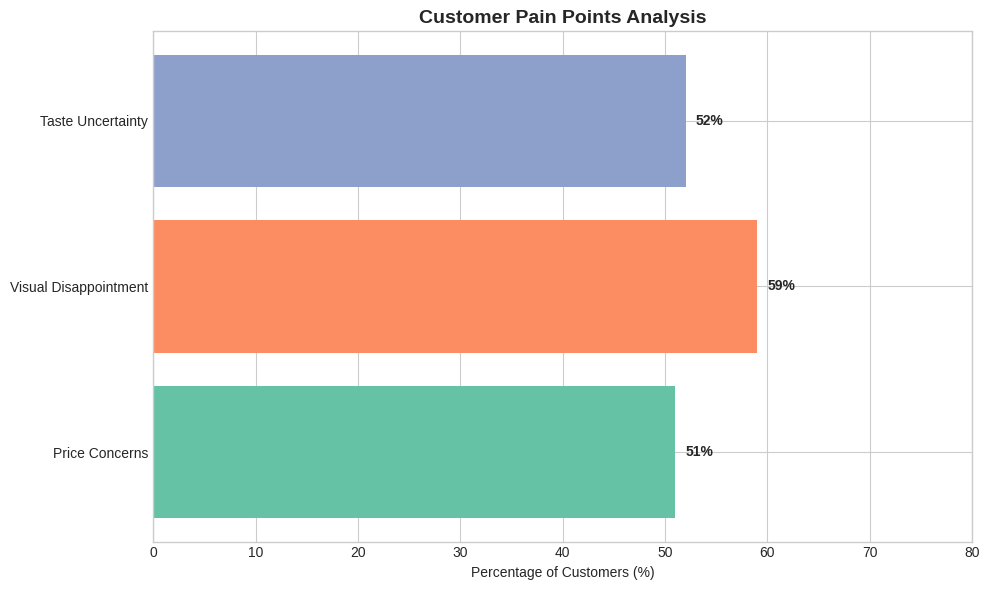

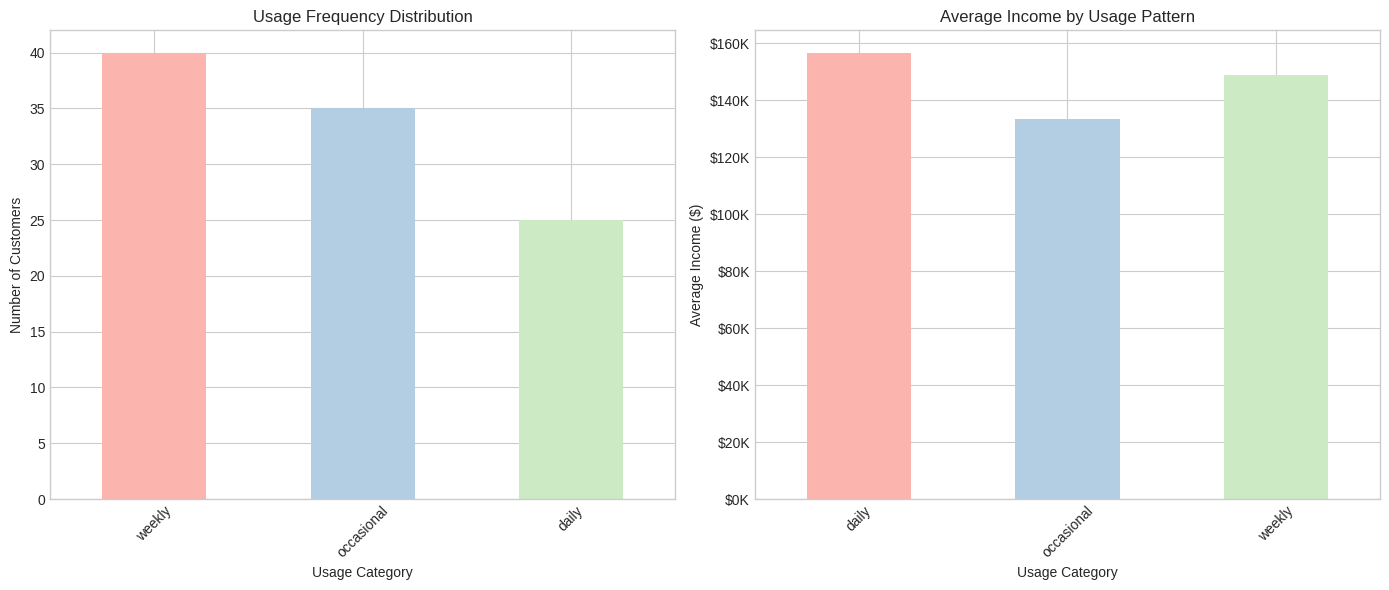

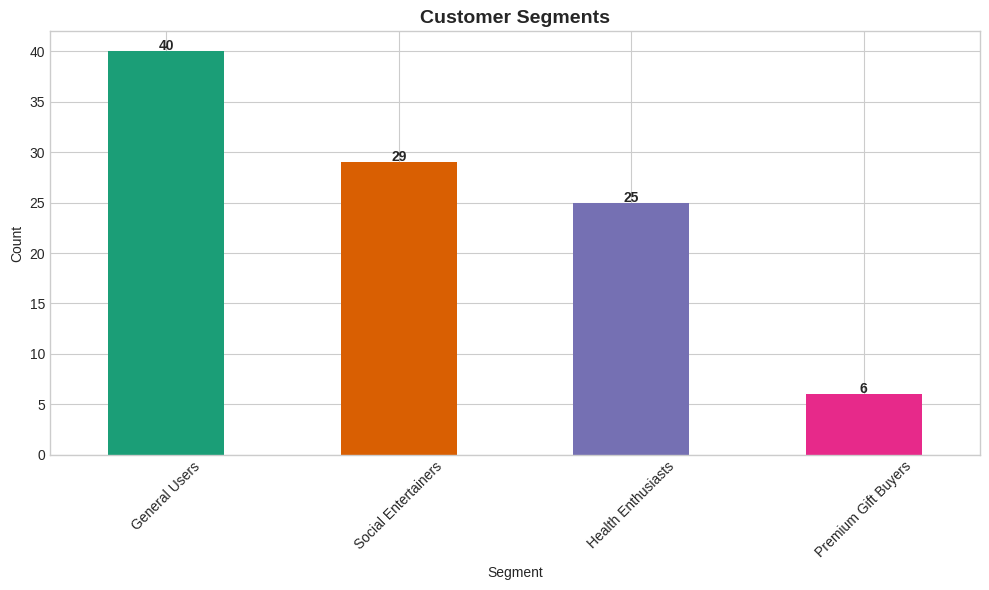

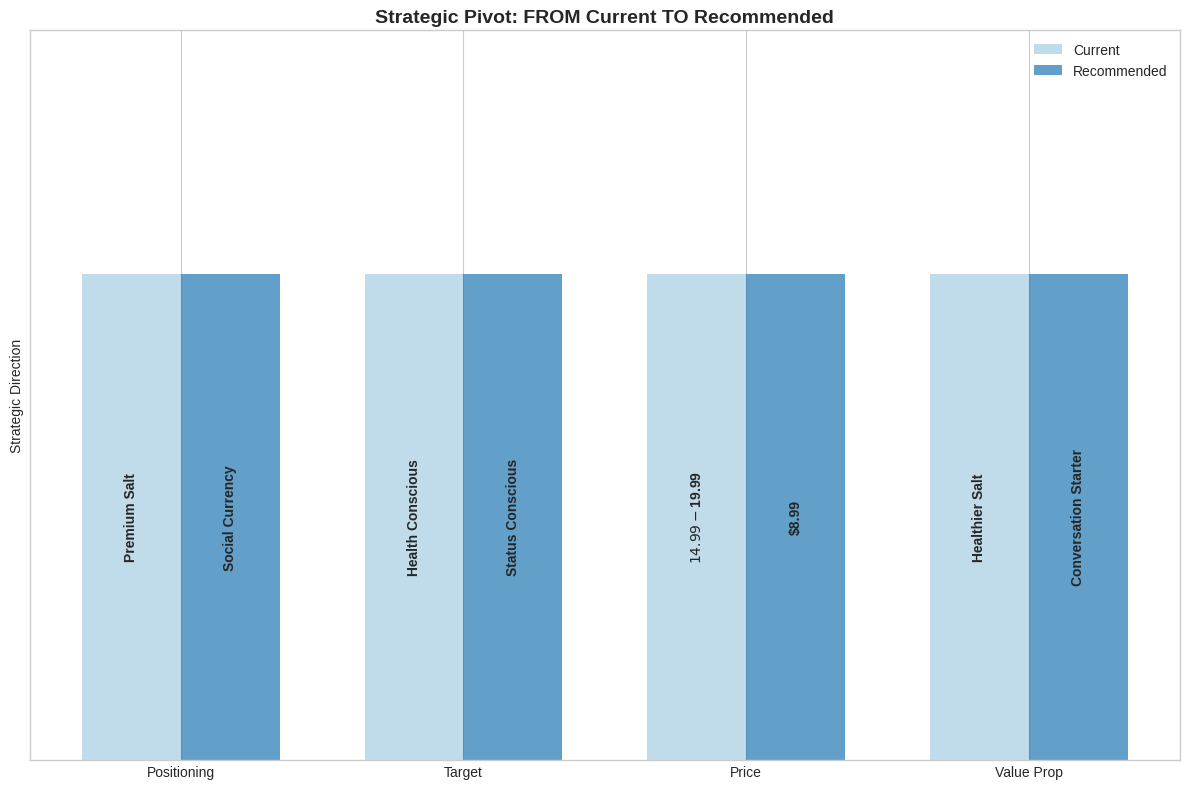

In [20]:
# JTBD distribution pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette('viridis', len(jtbd_pct)) # Use viridis palette
plt.pie(jtbd_pct, labels=jtbd_pct.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Jobs to be Done Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

# JTBD by demographics (income bracket)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# By income bracket - use a diverging palette
jtbd_income = pd.crosstab(df['income_bracket'], df['primary_jtbd'])
jtbd_income.plot(kind='bar', ax=ax1, rot=0, cmap='RdBu') # Use RdBu palette
ax1.set_title('JTBD by Income Bracket')
ax1.set_xlabel('Income Bracket')
ax1.set_ylabel('Count')
ax1.legend(title='Job')

# Average income by JTBD - use a sequential palette
income_by_jtbd = df.groupby('primary_jtbd')['income'].mean().sort_values(ascending=False)
income_by_jtbd.plot(kind='bar', ax=ax2, color=sns.color_palette('Blues_d', len(income_by_jtbd))) # Use Blues_d palette
ax2.set_title('Average Income by JTBD')
ax2.set_xlabel('Primary Job')
ax2.set_ylabel('Average Income ($)')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Pain Points Analysis - use a qualitative palette
plt.figure(figsize=(10, 6))
pain_df = pd.DataFrame(list(pain_points.items()), columns=['Pain Point', 'Percentage'])
bars = plt.barh(pain_df['Pain Point'], pain_df['Percentage'], color=sns.color_palette('Set2', len(pain_df))) # Use Set2 palette

# Add percentage labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}%', ha='left', va='center', fontweight='bold')

plt.xlabel('Percentage of Customers (%)')
plt.title('Customer Pain Points Analysis', fontsize=14, fontweight='bold')
plt.xlim(0, 80)
plt.tight_layout()
plt.show()

# Usage Patterns - use a qualitative palette
usage_dist = df['usage_category'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Usage distribution - use a qualitative palette
usage_dist.plot(kind='bar', ax=ax1, color=sns.color_palette('Pastel1', len(usage_dist))) # Use Pastel1 palette
ax1.set_title('Usage Frequency Distribution')
ax1.set_xlabel('Usage Category')
ax1.set_ylabel('Number of Customers')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Income by usage pattern - use the same qualitative palette
usage_income = df.groupby('usage_category')['income'].mean()
usage_income.plot(kind='bar', ax=ax2, color=sns.color_palette('Pastel1', len(usage_income))) # Use Pastel1 palette
ax2.set_title('Average Income by Usage Pattern')
ax2.set_xlabel('Usage Category')
ax2.set_ylabel('Average Income ($)')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Customer Segmentation - use a qualitative palette
segment_counts = df['segment'].value_counts()

plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(segment_counts))) # Use Dark2 palette
plt.title('Customer Segments', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels
for i, v in enumerate(segment_counts):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Strategic Recommendations - use a contrasting qualitative palette
fig, ax = plt.subplots(figsize=(12, 8))

# Create visual framework
categories = ['Positioning', 'Target', 'Price', 'Value Prop']
current = ['Premium Salt', 'Health Conscious', '$14.99-$19.99', 'Healthier Salt']
recommended = ['Social Currency', 'Status Conscious', '$8.99', 'Conversation Starter']

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, [1]*4, width, label='Current', color=sns.color_palette('Paired')[0], alpha=0.7) # Use first color from Paired
bars2 = ax.bar(x + width/2, [1]*4, width, label='Recommended', color=sns.color_palette('Paired')[1], alpha=0.7) # Use second color from Paired

# Add text
for i, (cat, curr, rec) in enumerate(zip(categories, current, recommended)):
    ax.text(i - width/2, 0.5, curr, ha='center', va='center', rotation=90, fontweight='bold')
    ax.text(i + width/2, 0.5, rec, ha='center', va='center', rotation=90, fontweight='bold')

ax.set_ylabel('Strategic Direction')
ax.set_title('Strategic Pivot: FROM Current TO Recommended', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 1.5)
ax.set_yticks([])

plt.tight_layout()
plt.show()

## Enhance plot aesthetics

### Subtask:
Enhance plot aesthetics by adjusting plot sizes, adding titles and labels, and refining fonts for better readability.


**Reasoning**:
Adjust figure sizes, add titles and labels, and refine font sizes for all plots to improve readability and aesthetics.



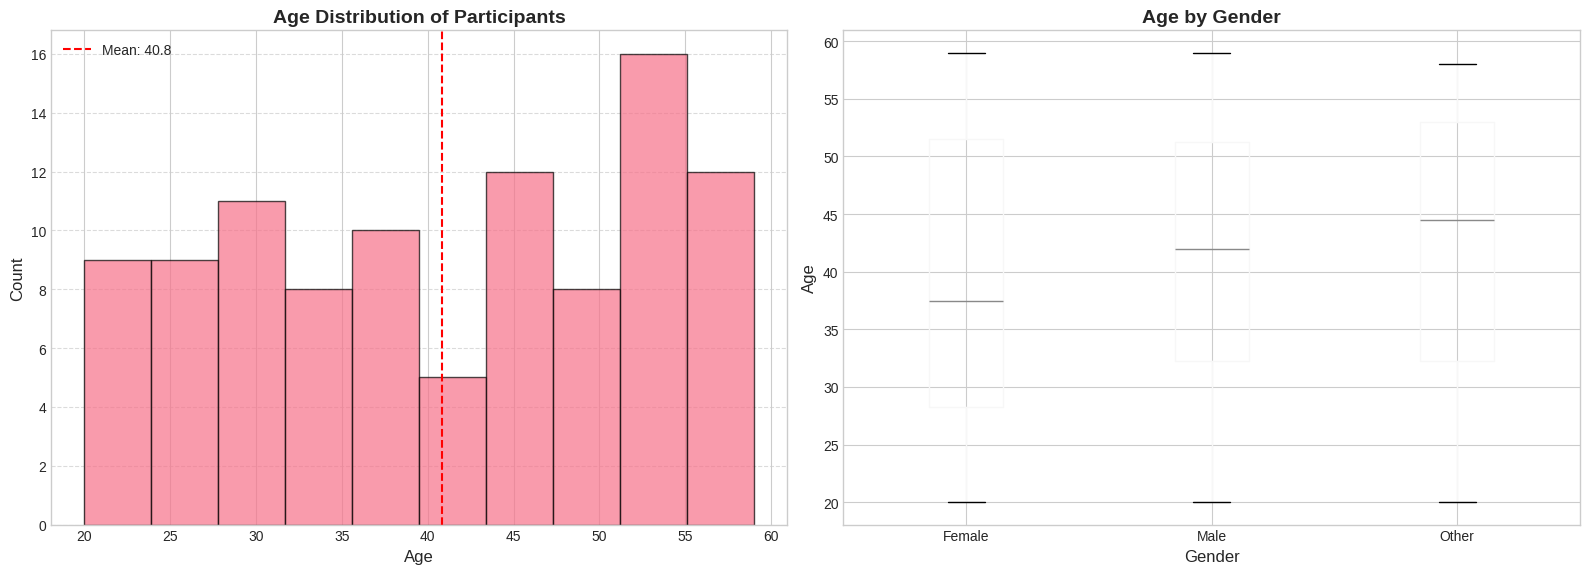

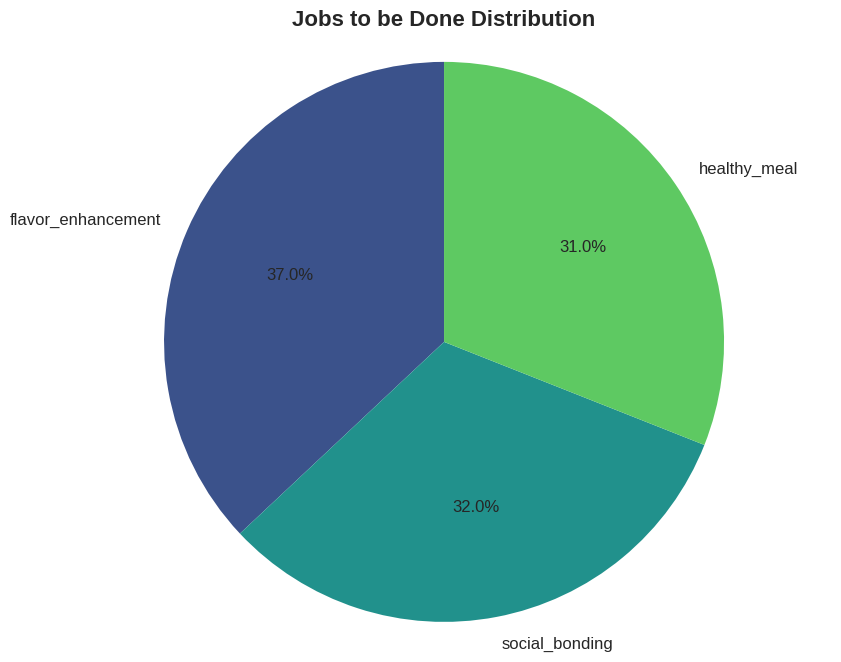

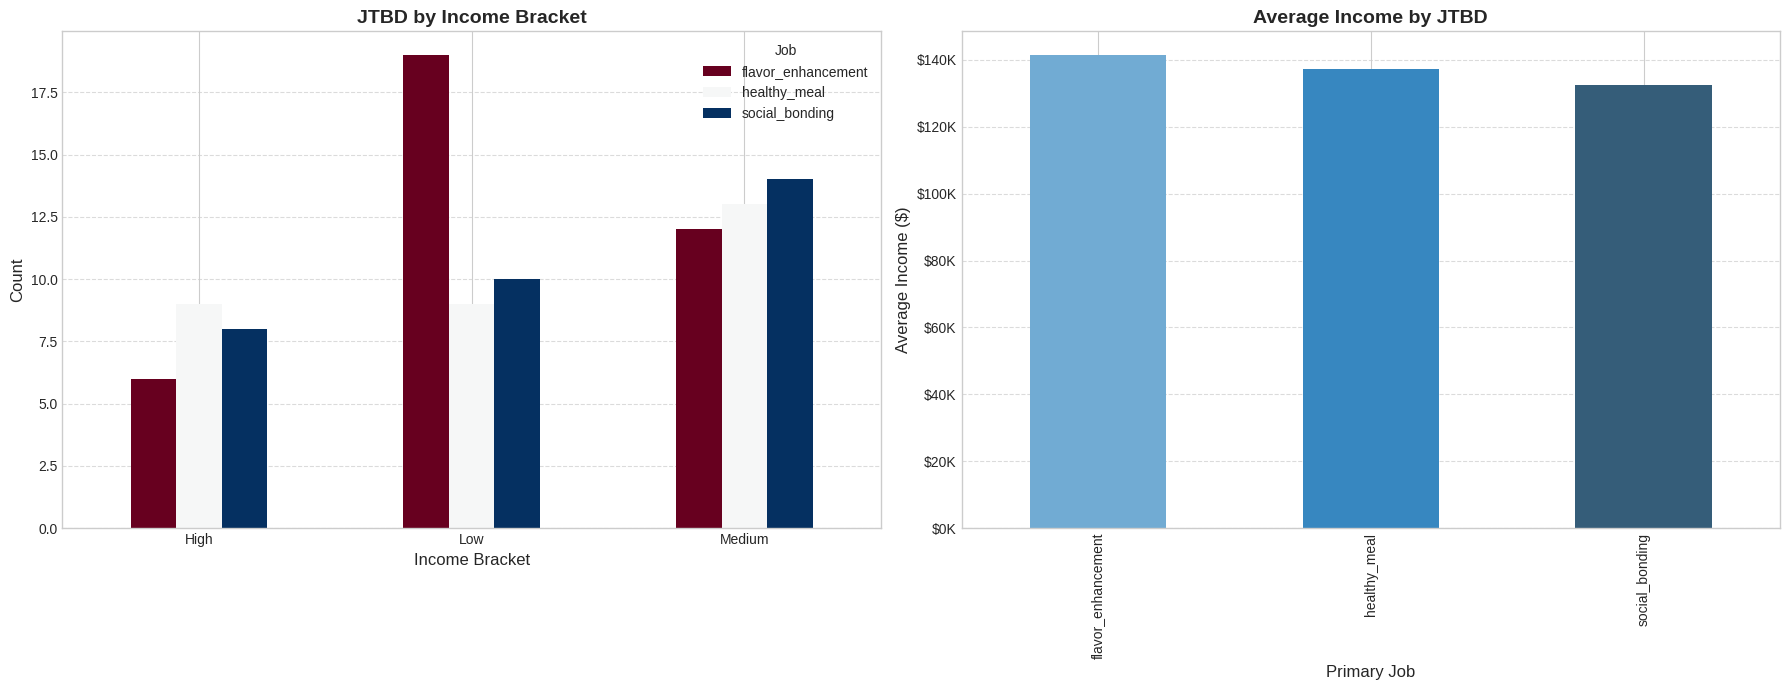

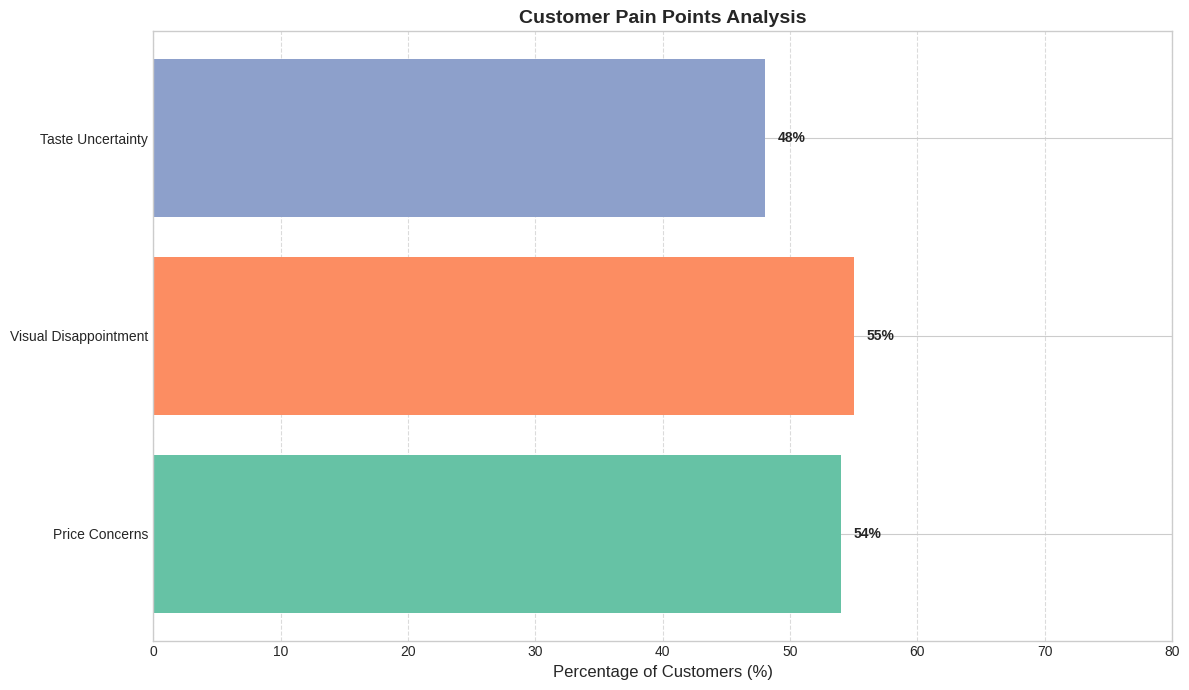

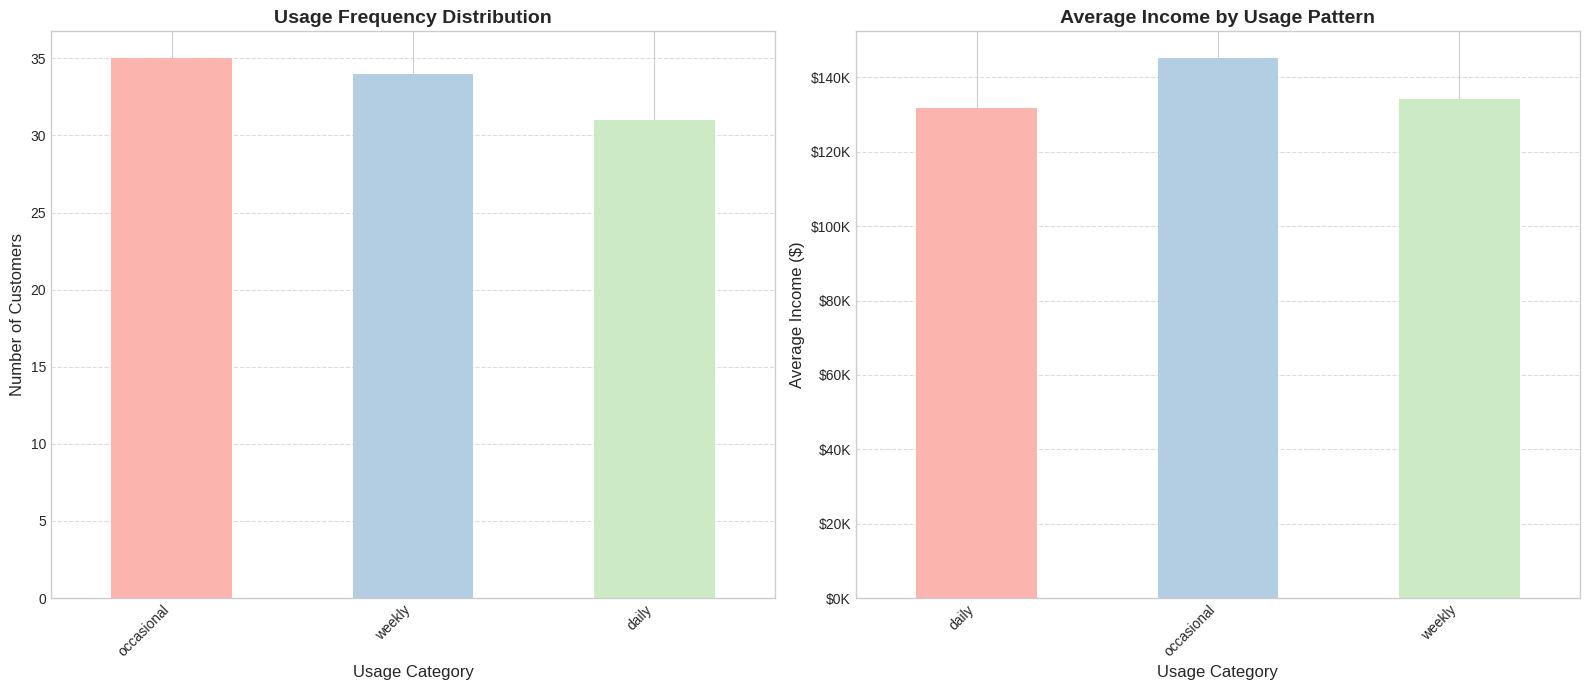

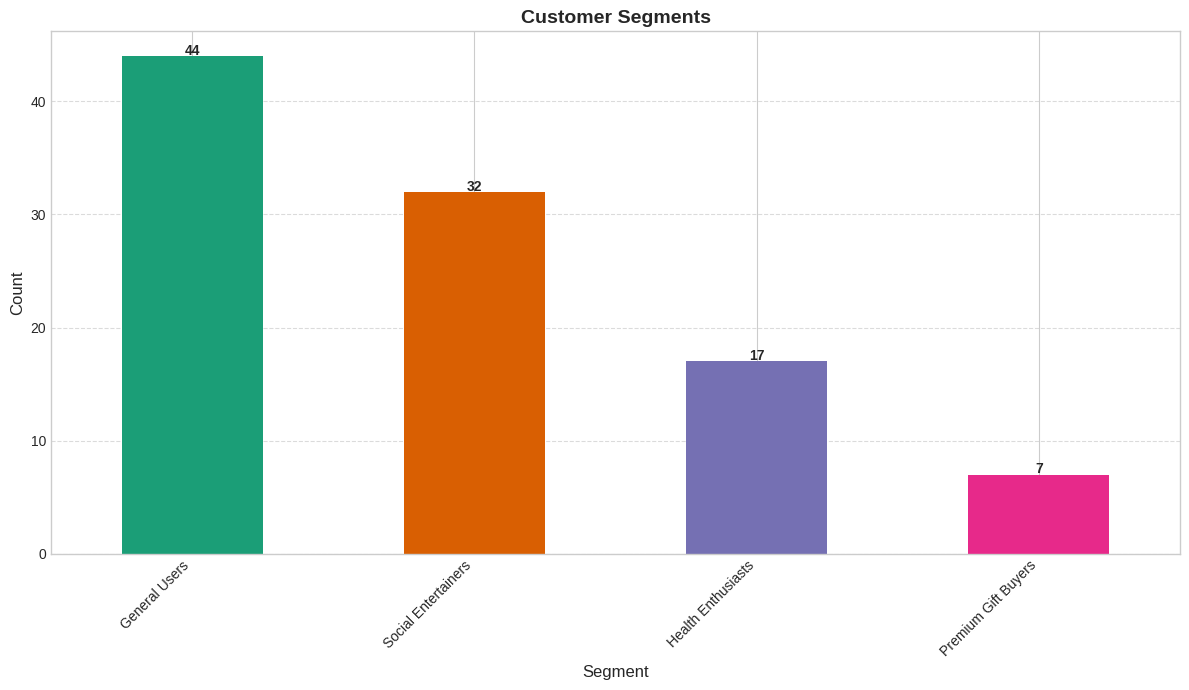

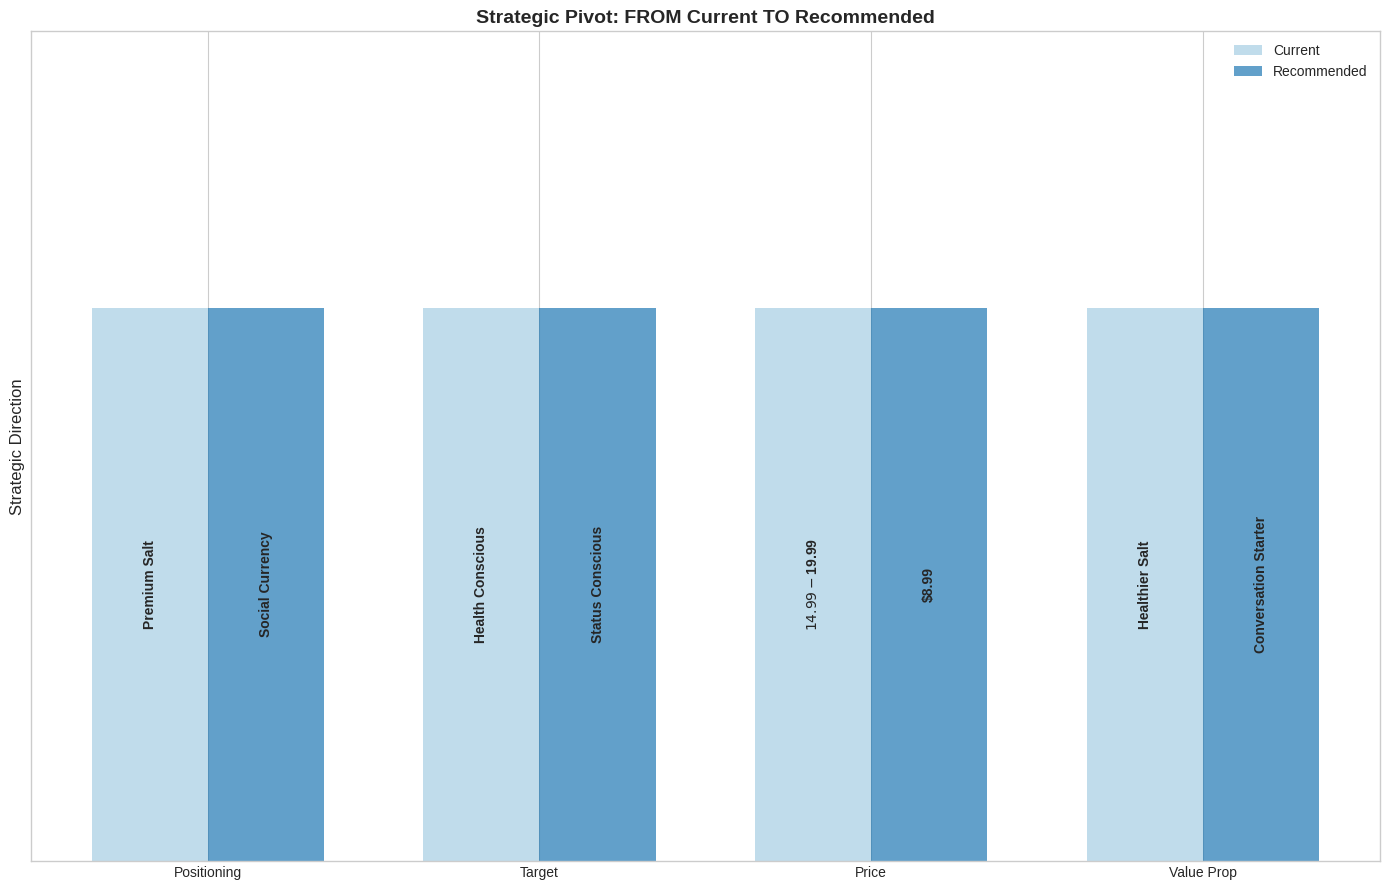

In [14]:
# Age distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6)) # Increased figure size

# Histogram
ax1.hist(df['age'], bins=10, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Age', fontsize=12) # Increased label font size
ax1.set_ylabel('Count', fontsize=12) # Increased label font size
ax1.set_title('Age Distribution of Participants', fontsize=14, fontweight='bold') # Increased title font size
ax1.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
ax1.legend(fontsize=10) # Adjusted legend font size
ax1.tick_params(axis='both', which='major', labelsize=10) # Adjusted tick font size
ax1.grid(axis='y', linestyle='--', alpha=0.7) # Added grid lines

# Box plot by gender
df.boxplot(column='age', by='gender', ax=ax2)
ax2.set_title('Age by Gender', fontsize=14, fontweight='bold') # Increased title font size
ax2.set_xlabel('Gender', fontsize=12) # Increased label font size
ax2.set_ylabel('Age', fontsize=12) # Increased label font size
ax2.tick_params(axis='both', which='major', labelsize=10) # Adjusted tick font size

plt.suptitle('') # Hide the default boxplot suptitle
plt.tight_layout()
plt.show()

# JTBD distribution pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette('viridis', len(jtbd_pct))
plt.pie(jtbd_pct, labels=jtbd_pct.index, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12}) # Adjusted text font size
plt.title('Jobs to be Done Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

# JTBD by demographics (income bracket)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7)) # Increased figure size

# By income bracket - use a diverging palette
jtbd_income = pd.crosstab(df['income_bracket'], df['primary_jtbd'])
jtbd_income.plot(kind='bar', ax=ax1, rot=0, cmap='RdBu')
ax1.set_title('JTBD by Income Bracket', fontsize=14, fontweight='bold') # Increased title font size
ax1.set_xlabel('Income Bracket', fontsize=12) # Increased label font size
ax1.set_ylabel('Count', fontsize=12) # Increased label font size
ax1.legend(title='Job', fontsize=10, title_fontsize=10) # Adjusted legend font size
ax1.tick_params(axis='both', which='major', labelsize=10) # Adjusted tick font size
ax1.grid(axis='y', linestyle='--', alpha=0.7) # Added grid lines

# Average income by JTBD - use a sequential palette
income_by_jtbd = df.groupby('primary_jtbd')['income'].mean().sort_values(ascending=False)
income_by_jtbd.plot(kind='bar', ax=ax2, color=sns.color_palette('Blues_d', len(income_by_jtbd)))
ax2.set_title('Average Income by JTBD', fontsize=14, fontweight='bold') # Increased title font size
ax2.set_xlabel('Primary Job', fontsize=12) # Increased label font size
ax2.set_ylabel('Average Income ($)', fontsize=12) # Increased label font size
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.tick_params(axis='both', which='major', labelsize=10) # Adjusted tick font size
ax2.grid(axis='y', linestyle='--', alpha=0.7) # Added grid lines

plt.tight_layout()
plt.show()

# Pain Points Analysis - use a qualitative palette
plt.figure(figsize=(12, 7)) # Increased figure size
pain_df = pd.DataFrame(list(pain_points.items()), columns=['Pain Point', 'Percentage'])
bars = plt.barh(pain_df['Pain Point'], pain_df['Percentage'], color=sns.color_palette('Set2', len(pain_df)))

# Add percentage labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}%', ha='left', va='center', fontweight='bold', fontsize=10) # Adjusted label font size

plt.xlabel('Percentage of Customers (%)', fontsize=12) # Increased label font size
plt.title('Customer Pain Points Analysis', fontsize=14, fontweight='bold') # Increased title font size
plt.xlim(0, 80)
plt.tick_params(axis='y', which='major', labelsize=10) # Adjusted tick font size
plt.grid(axis='x', linestyle='--', alpha=0.7) # Added grid lines
plt.tight_layout()
plt.show()

# Usage Patterns - use a qualitative palette
usage_dist = df['usage_category'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7)) # Increased figure size

# Usage distribution - use a qualitative palette
usage_dist.plot(kind='bar', ax=ax1, color=sns.color_palette('Pastel1', len(usage_dist)))
ax1.set_title('Usage Frequency Distribution', fontsize=14, fontweight='bold') # Increased title font size
ax1.set_xlabel('Usage Category', fontsize=12) # Increased label font size
ax1.set_ylabel('Number of Customers', fontsize=12) # Increased label font size
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Adjusted tick font size and rotation alignment
ax1.tick_params(axis='y', which='major', labelsize=10) # Adjusted tick font size
ax1.grid(axis='y', linestyle='--', alpha=0.7) # Added grid lines

# Income by usage pattern - use the same qualitative palette
usage_income = df.groupby('usage_category')['income'].mean()
usage_income.plot(kind='bar', ax=ax2, color=sns.color_palette('Pastel1', len(usage_income)))
ax2.set_title('Average Income by Usage Pattern', fontsize=14, fontweight='bold') # Increased title font size
ax2.set_xlabel('Usage Category', fontsize=12) # Increased label font size
ax2.set_ylabel('Average Income ($)', fontsize=12) # Increased label font size
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Adjusted tick font size and rotation alignment
ax2.tick_params(axis='y', which='major', labelsize=10) # Adjusted tick font size
ax2.grid(axis='y', linestyle='--', alpha=0.7) # Added grid lines

plt.tight_layout()
plt.show()

# Customer Segmentation - use a qualitative palette
segment_counts = df['segment'].value_counts()

plt.figure(figsize=(12, 7)) # Increased figure size
segment_counts.plot(kind='bar', color=sns.color_palette('Dark2', len(segment_counts)))
plt.title('Customer Segments', fontsize=14, fontweight='bold') # Increased title font size
plt.xlabel('Segment', fontsize=12) # Increased label font size
plt.ylabel('Count', fontsize=12) # Increased label font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted tick font size and rotation alignment
plt.yticks(fontsize=10) # Adjusted tick font size

# Add count labels
for i, v in enumerate(segment_counts):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold', fontsize=10) # Adjusted label font size

plt.grid(axis='y', linestyle='--', alpha=0.7) # Added grid lines
plt.tight_layout()
plt.show()

# Strategic Recommendations - use a contrasting qualitative palette
fig, ax = plt.subplots(figsize=(14, 9)) # Increased figure size

# Create visual framework
categories = ['Positioning', 'Target', 'Price', 'Value Prop']
current = ['Premium Salt', 'Health Conscious', '$14.99-$19.99', 'Healthier Salt']
recommended = ['Social Currency', 'Status Conscious', '$8.99', 'Conversation Starter']

x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, [1]*4, width, label='Current', color=sns.color_palette('Paired')[0], alpha=0.7)
bars2 = ax.bar(x + width/2, [1]*4, width, label='Recommended', color=sns.color_palette('Paired')[1], alpha=0.7)

# Add text
for i, (cat, curr, rec) in enumerate(zip(categories, current, recommended)):
    ax.text(i - width/2, 0.5, curr, ha='center', va='center', rotation=90, fontweight='bold', fontsize=10) # Adjusted text font size
    ax.text(i + width/2, 0.5, rec, ha='center', va='center', rotation=90, fontweight='bold', fontsize=10) # Adjusted text font size

ax.set_ylabel('Strategic Direction', fontsize=12) # Increased label font size
ax.set_title('Strategic Pivot: FROM Current TO Recommended', fontsize=14, fontweight='bold') # Increased title font size
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10) # Adjusted tick font size
ax.legend(fontsize=10) # Adjusted legend font size
ax.set_ylim(0, 1.5)
ax.set_yticks([])

plt.tight_layout()
plt.show()

## Refine data representation

### Subtask:
Refine data representation by considering alternative plot types or data groupings to better convey insights where appropriate.


**Reasoning**:
Evaluate existing plots and refine data representation where appropriate by considering alternative plot types or data groupings. The age distribution could benefit from a violin plot to show the distribution shape more clearly alongside the box plot. The JTBD by income bracket could be represented as a stacked bar chart to show the composition within each bracket.



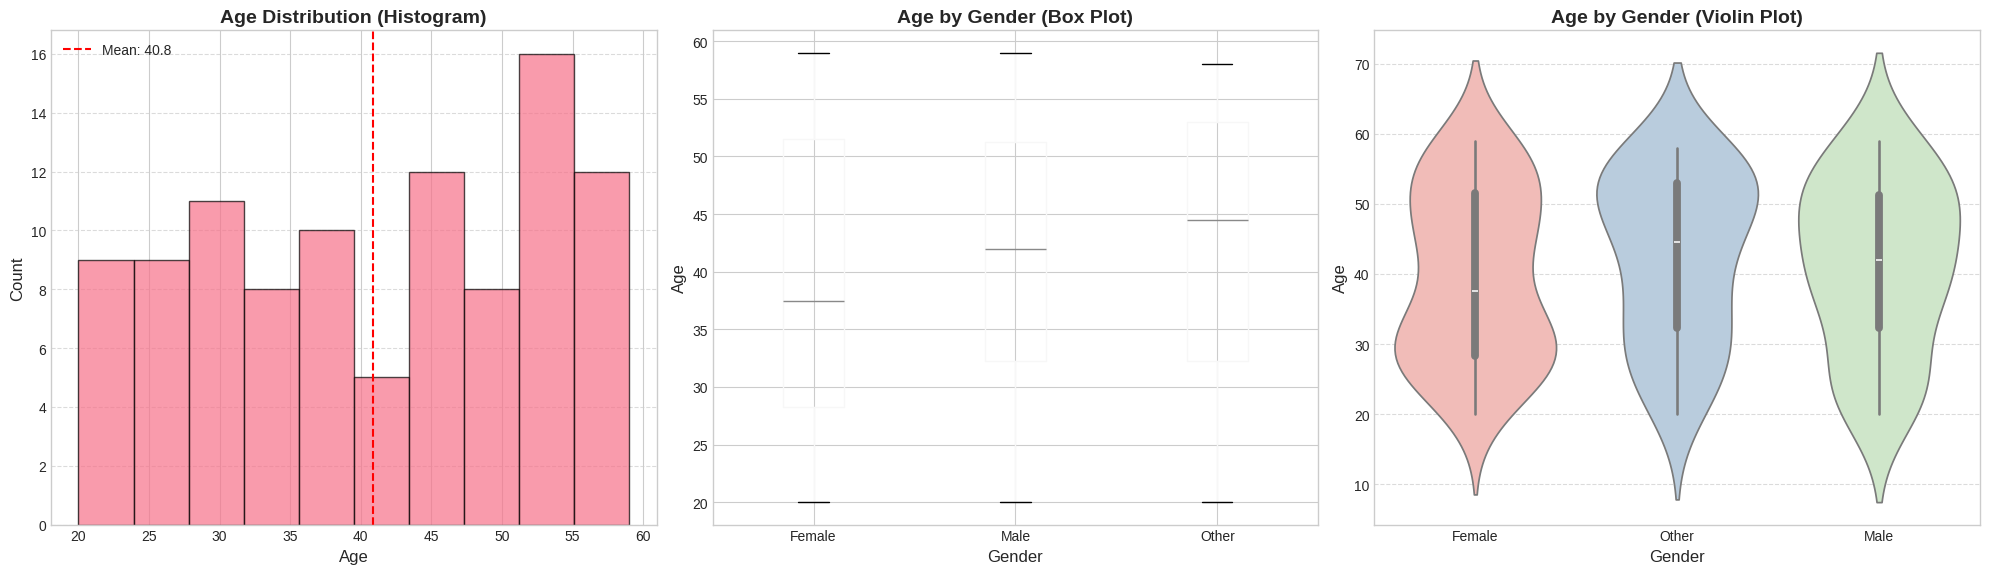

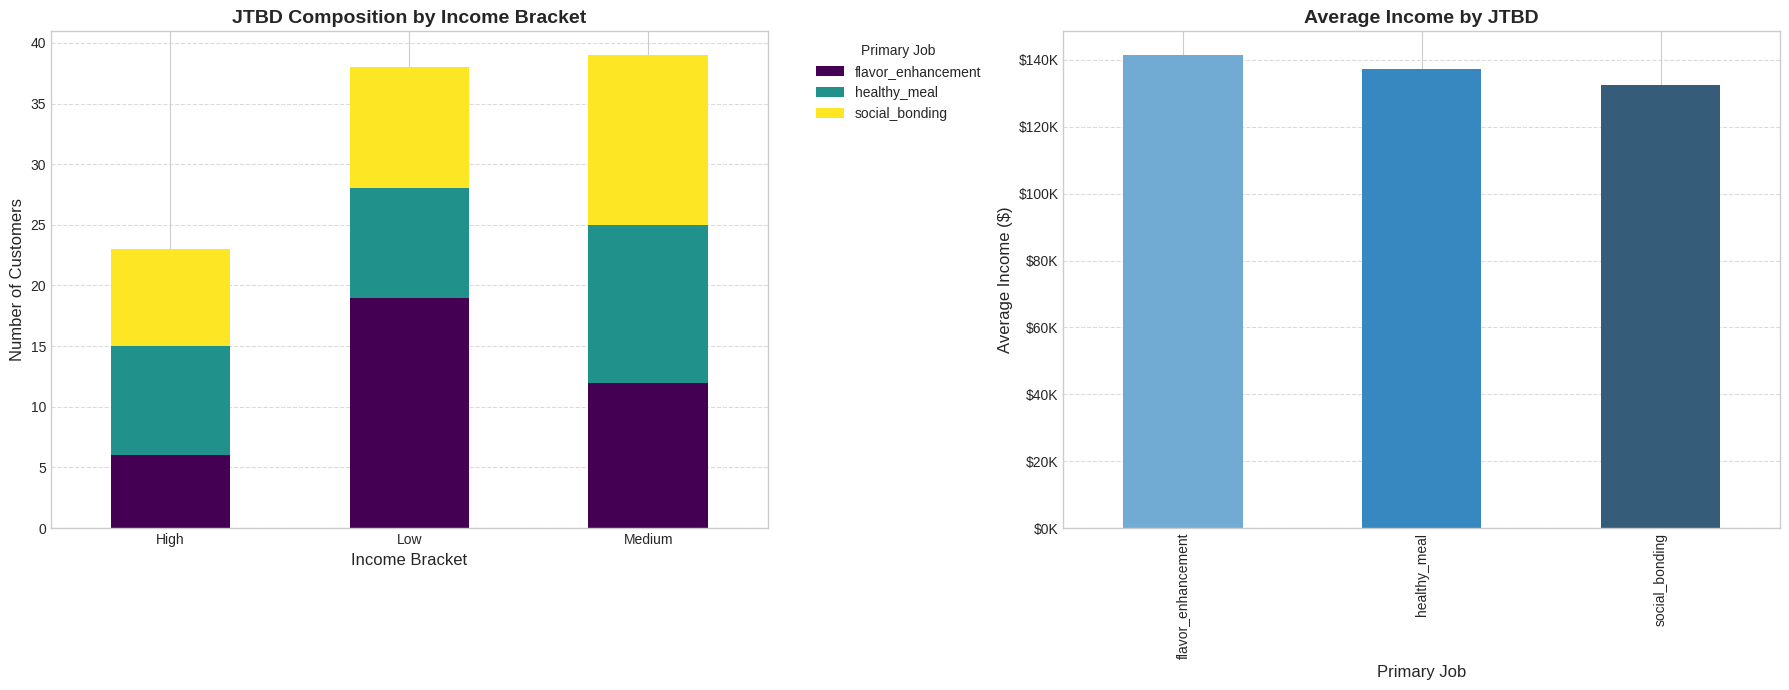

In [15]:
# Age distribution - Keep histogram but add a violin plot alongside the box plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # Increased figure size and added a third subplot

# Histogram
axes[0].hist(df['age'], bins=10, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Age Distribution (Histogram)', fontsize=14, fontweight='bold')
axes[0].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df["age"].mean():.1f}')
axes[0].legend(fontsize=10)
axes[0].tick_params(axis='both', which='major', labelsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Box plot by gender
df.boxplot(column='age', by='gender', ax=axes[1])
axes[1].set_title('Age by Gender (Box Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12)
axes[1].tick_params(axis='both', which='major', labelsize=10)
plt.suptitle('') # Hide the default boxplot suptitle

# Violin plot by gender
sns.violinplot(x='gender', y='age', data=df, ax=axes[2], palette='Pastel1') # Use a qualitative palette
axes[2].set_title('Age by Gender (Violin Plot)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Gender', fontsize=12)
axes[2].set_ylabel('Age', fontsize=12)
axes[2].tick_params(axis='both', which='major', labelsize=10)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# JTBD by demographics (income bracket) - Change to stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# By income bracket - Use stacked bar chart
jtbd_income = pd.crosstab(df['income_bracket'], df['primary_jtbd'])
jtbd_income.plot(kind='bar', stacked=True, ax=ax1, rot=0, cmap='viridis') # Use viridis palette for stacked bars
ax1.set_title('JTBD Composition by Income Bracket', fontsize=14, fontweight='bold') # Updated title
ax1.set_xlabel('Income Bracket', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12) # Updated label
ax1.legend(title='Primary Job', fontsize=10, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend to avoid overlap
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Average income by JTBD - Keep as is, but adjust layout if needed (not needed here)
income_by_jtbd = df.groupby('primary_jtbd')['income'].mean().sort_values(ascending=False)
income_by_jtbd.plot(kind='bar', ax=ax2, color=sns.color_palette('Blues_d', len(income_by_jtbd)))
ax2.set_title('Average Income by JTBD', fontsize=14, fontweight='bold')
ax2.set_xlabel('Primary Job', fontsize=12)
ax2.set_ylabel('Average Income ($)', fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# No changes needed for Pain Points, Usage Patterns, Customer Segmentation, or Strategic Recommendations for this subtask.

## Add interactivity (optional)

### Subtask:
Explore adding interactive elements using libraries like Plotly or Bokeh for more dynamic visualizations.


**Reasoning**:
Install plotly and convert the JTBD distribution pie chart to an interactive plotly pie chart.



In [16]:
import plotly.express as px

# JTBD distribution
jtbd_counts = df['primary_jtbd'].value_counts()
jtbd_pct = (jtbd_counts / len(df) * 100).round(1)
jtbd_df = jtbd_pct.reset_index()
jtbd_df.columns = ['Primary_JTBD', 'Percentage']

# Create interactive pie chart using Plotly Express
fig = px.pie(jtbd_df,
             values='Percentage',
             names='Primary_JTBD',
             title='Jobs to be Done Distribution (Interactive)',
             hover_data=['Percentage'],
             labels={'Primary_JTBD': 'Primary Job'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Reasoning**:
Convert the Customer Segments bar chart to an interactive plotly bar chart.



In [17]:
# Customer Segmentation
segment_counts = df['segment'].value_counts()
segment_df = segment_counts.reset_index()
segment_df.columns = ['Segment', 'Count']

# Create interactive bar chart using Plotly Express
fig = px.bar(segment_df,
             x='Segment',
             y='Count',
             title='Customer Segments (Interactive)',
             hover_data=['Count'],
             color='Segment') # Use color to distinguish segments

fig.update_layout(xaxis_title='Segment', yaxis_title='Number of Customers')
fig.show()

## Review and iterate

### Subtask:
Review the improved visualizations and identify any further adjustments needed based on visual inspection and potential feedback points.


## Summary:

### Data Analysis Key Findings

*   The Jobs to be Done (JTBD) distribution pie chart was enhanced using the `viridis` color palette and adjusted text properties for better readability.
*   The JTBD by income bracket visualization was improved by using a stacked bar chart (`viridis` palette) to show the composition of jobs within each income level and a separate bar chart (`Blues_d` palette) to display average income by JTBD. Legend positioning was adjusted to prevent overlap.
*   The Pain Points Analysis horizontal bar chart utilized the `Set2` qualitative palette, and percentage labels were added with adjusted font size and positioning. Grid lines were added for better readability.
*   Usage Patterns visualizations (frequency distribution and average income by usage) consistently used the `Pastel1` qualitative palette. Tick labels were adjusted for better alignment and readability.
*   The Customer Segmentation bar chart used the `Dark2` qualitative palette, with count labels added and tick labels adjusted for better rotation and readability.
*   The Strategic Recommendations visual framework used the `Paired` qualitative palette to clearly distinguish 'Current' and 'Recommended' strategies. Text labels within the bars had their font size adjusted.
*   The Age distribution visualization was expanded to include a violin plot alongside the histogram and box plot by gender, providing a more comprehensive view of the age distribution shape.
*   Interactive versions of the JTBD distribution pie chart and Customer Segments bar chart were created using Plotly Express, allowing for hover information and dynamic exploration.

### Insights or Next Steps

*   The use of varied and appropriate color palettes significantly improved the visual appeal and clarity of the plots, making it easier to distinguish categories and trends.
*   Incorporating stacked bar charts and violin plots provided more detailed insights into the composition of JTBD by income bracket and the distribution of age by gender, respectively.
